# SR/SDR Optimization
#### Which SR or SDR should talk with each kind of lead?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15.0, 16.0)
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
%matplotlib inline

#using the cleaned marketing funnel data to merge with sellers
funnel_df = pd.read_csv("output/cleaned_marketing_funnel.csv")

![funnel full schema](images/full_data_schema.PNG)

In [2]:
funnel_df.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,first_contact_date,landing_page_id,origin,close_duration
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,2018-02-21 00:00:00,b48ec5f3b04e9068441002a19df93c6c,organic_search,5 days 19:58:54.000000000
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller,0.0,2018-04-04 00:00:00,2f08471dfb83baef522f952438a36f6e,referral,34 days 20:17:59.000000000
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0,2018-04-03 00:00:00,1ceb590cd1e00c7ee95220971f82693d,organic_search,63 days 17:27:23.000000000
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,unknown,reseller,0.0,2018-01-14 00:00:00,22c29808c4f815213303f8933030604c,paid_search,3 days 13:51:03.000000000
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0,2017-10-09 00:00:00,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,267 days 20:17:45.000000000


In [3]:
def pichart_with_table(main_df,column_name,count_variable,title,top_n,filename,tab_s1_size):
    fig = plt.figure(figsize=(10,6))

    summary = main_df.groupby(column_name)[count_variable].nunique().sort_values(ascending=False)
    df = pd.DataFrame({'source':summary.index, 'counts':summary.values})
    labels = df['source']
    counts = df['counts']

    ax1 = fig.add_subplot(121)
    if top_n > 0:
        ax1.pie(counts[0:top_n], labels=labels[0:top_n], autopct='%1.1f%%', startangle=180)
    else:
        ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=180)
    ax1.set_title(title)
    ax1.axis('equal')

    ax2 = fig.add_subplot(122)
    font_size=10
    ax2.axis('off')
    df_table = ax2.table(cellText=df.values[0:top_n], colLabels=df.columns, loc="center",colWidths=[tab_s1_size,0.2])
    df_table.auto_set_font_size(False)
    df_table.set_fontsize(font_size)

    fig.tight_layout()
    plt.savefig(filename)
    plt.show()


## Seller Dataset
Sellers dataset contains 4 fields which describe the seller zipcode,seller_city and seller_state.
1. **3095** unique sellers
2. **611** unique cities in which these sellers reside
3. **23** states

In [220]:
seller_df = pd.read_csv("data/adnu_sellers_dataset.csv")

In [221]:
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [222]:
seller_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,7238a95bb63ef7e498389fb863b834a1,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


#### Seller data different columns analysis

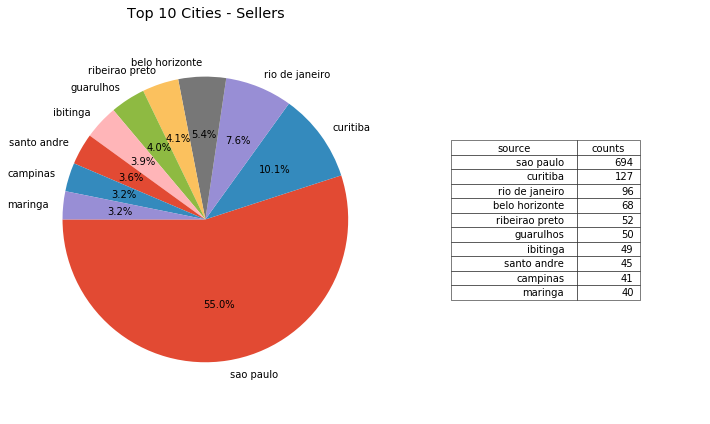

In [49]:
pichart_with_table(seller_df,"seller_city","seller_id","Top 10 Cities - Sellers",10,"charts/seller_top_cities.png",0.4)

## Combining both seller data and marketing funnel data

We see that we had got the data of **841 closed deals** mapped from **8000** MQL dataset.

Now combining with seller dataset, we see that out of those 841 closed deals, we have only **379** present out of **3095** sellers in seller dataset **(~45%)**


In [24]:
sf_df = funnel_df.merge(seller_df, on="seller_id", how= "left")
sf_df.describe(include="all")

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,first_contact_date,landing_page_id,origin,close_duration,seller_zip_code_prefix,seller_city,seller_state
count,841,841,841,841,841,841,841,841,841,8.410000e+02,841,841,841,841,379.000000,379,379
unique,841,841,32,22,823,34,9,10,4,NaN,195,134,10,821,NaN,166,13
top,07c70f3b440791aa82c370d17910f32f,df91910b6a03bb2e3358fa6a35e32f6f,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-04 03:00:00,home_decor,online_medium,cat,reseller,NaN,2018-02-06 00:00:00,22c29808c4f815213303f8933030604c,organic_search,6 days 03:00:00.000000000,NaN,sao paulo,SP
freq,1,1,140,133,6,105,332,406,586,NaN,14,174,270,5,NaN,87,231
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.346493e+04,NaN,NaN,NaN,NaN,30573.287599,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.745836e+06,NaN,NaN,NaN,NaN,32326.381293,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1022.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,7080.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,14090.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,38407.000000,NaN,NaN


In [224]:
#removing those who do not contain seller_city as there was 1-1 mapping of sellerid and city in seller dataset
sf_df.dropna(subset=['seller_id', 'seller_city'],inplace=True)
sf_df.reset_index(drop=True)
sf_df.describe(include="all")

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,first_contact_date,landing_page_id,origin,close_duration,seller_zip_code_prefix,seller_city,seller_state
count,379,379,379,379,379,379,379,379,379,379.0,379,379,379,379,379.000000,379,379
unique,379,379,18,18,371,29,8,7,3,NaN,142,75,9,371,NaN,166,13
top,caea756b29bd071f00ce526f40645a78,52a50b42accf164f9f019941e5759d9b,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-04 03:00:00,home_decor,online_medium,cat,reseller,NaN,2018-04-04 00:00:00,22c29808c4f815213303f8933030604c,organic_search,0 days 03:00:00.000000000,NaN,sao paulo,SP
freq,1,1,70,75,4,44,172,183,286,NaN,8,82,112,3,NaN,87,231
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,30573.287599,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,32326.381293,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1022.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7080.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,14090.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,38407.000000,NaN,NaN


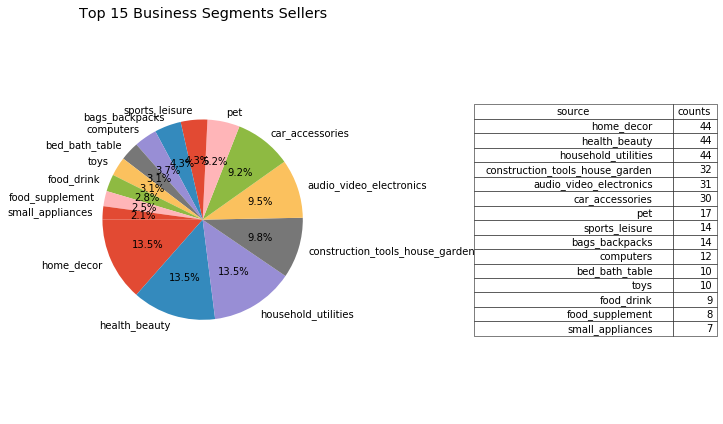

In [50]:
pichart_with_table(sf_df,"business_segment","seller_id","Top 15 Business Segments Sellers",15,"charts/sf_business_segment.png",0.9)

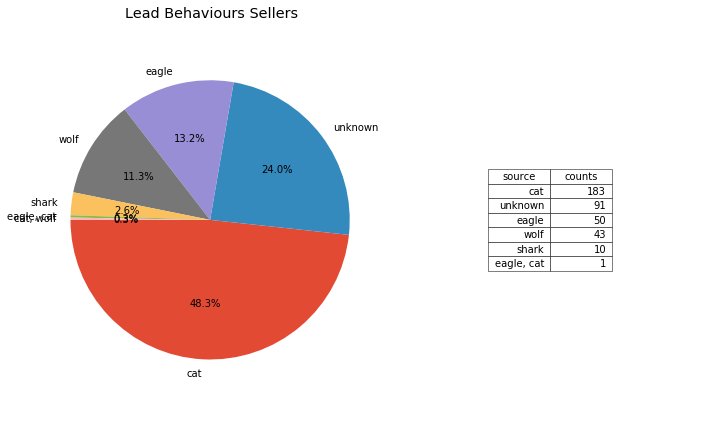

In [52]:
pichart_with_table(sf_df,"lead_behaviour_profile","seller_id","Lead Behaviours Sellers",-1,"charts/sf_lead_behaviour.png",0.2)

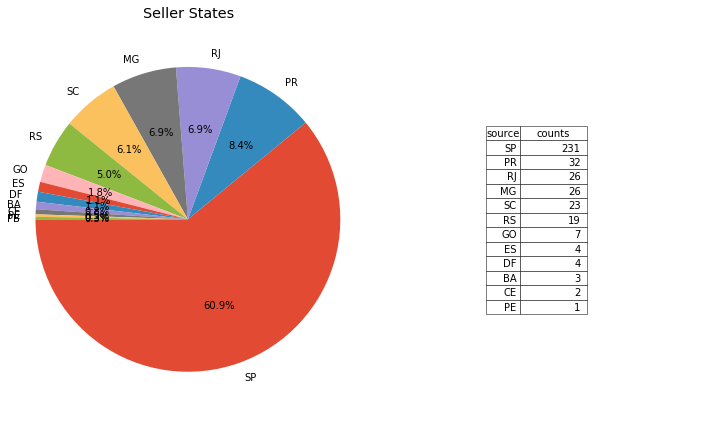

In [53]:
pichart_with_table(sf_df,"seller_state","seller_id","Seller States",-1,"charts/sf_seller_state.png",0.1)

In [88]:
def horizontal_bar_group(main_df,group_list,control_count,title,filename,sortflag,vertical="no"):
    fig = plt.figure(figsize=(10,10))
    if sortflag:
        df = main_df.groupby(group_list).size().sort_values(ascending=True)
    else:
        df = main_df.groupby(group_list).size()
    if vertical!="no":
        df[df.values > control_count].plot(kind = "bar")
    else:
        df[df.values > control_count].plot(kind = "barh")
    plt.title(title)
    if filename != "n":
        plt.savefig(filename)
    plt.xlabel("deal count")
    plt.show()

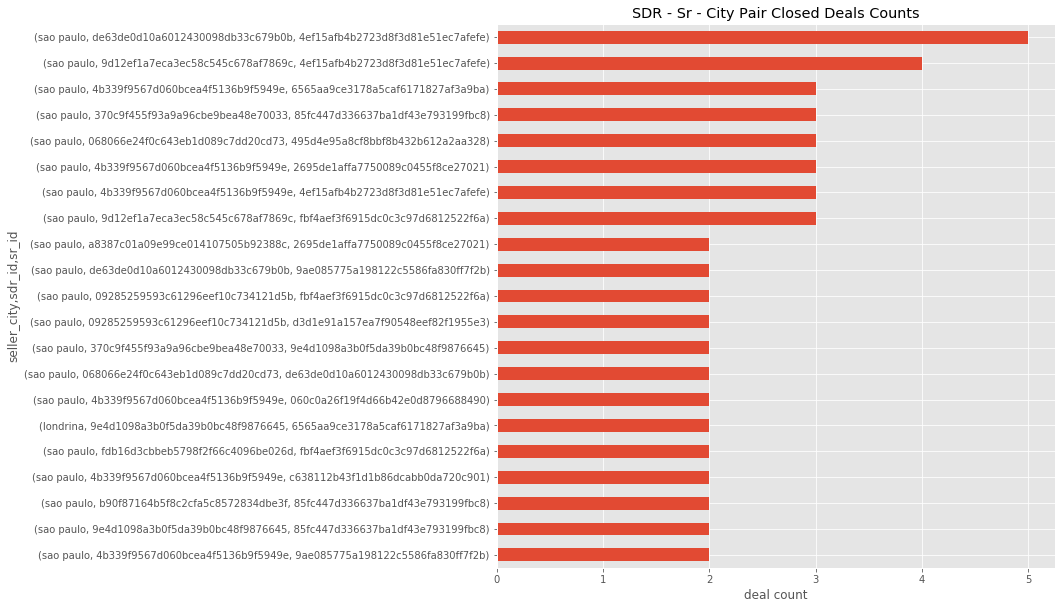

In [81]:
#SDR - SR combination by cities
horizontal_bar_group(sf_df,["seller_city","sdr_id","sr_id"],1,"SDR - Sr - City Pair Closed Deals Counts","n",True)


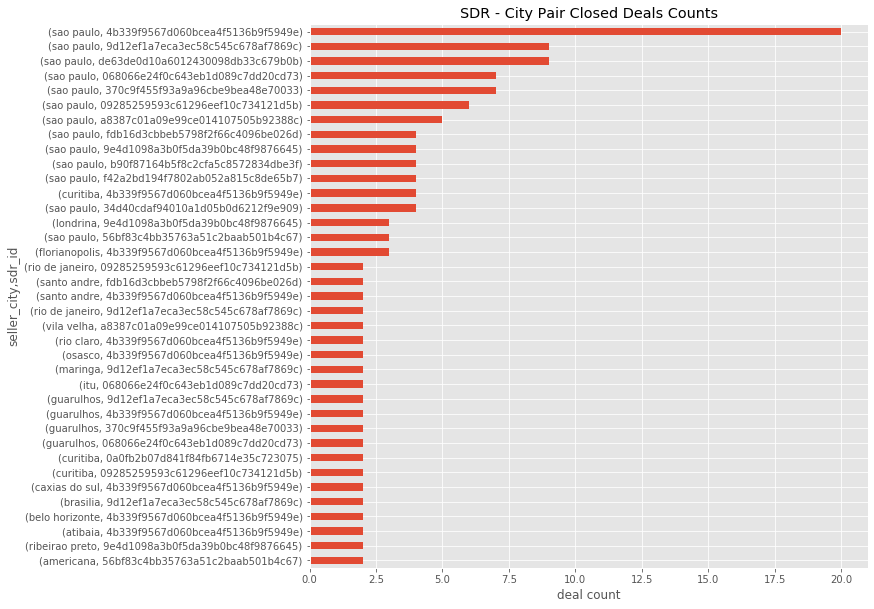

In [82]:
horizontal_bar_group(sf_df,["seller_city","sdr_id"],1,"SDR - City Pair Closed Deals Counts","n",True)


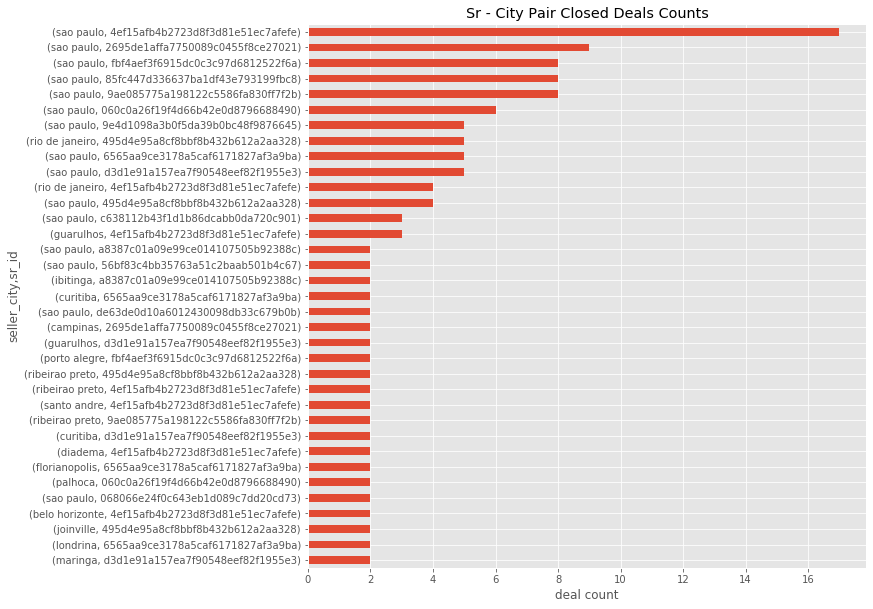

In [83]:
horizontal_bar_group(sf_df,["seller_city","sr_id"],1,"Sr - City Pair Closed Deals Counts","n",True)


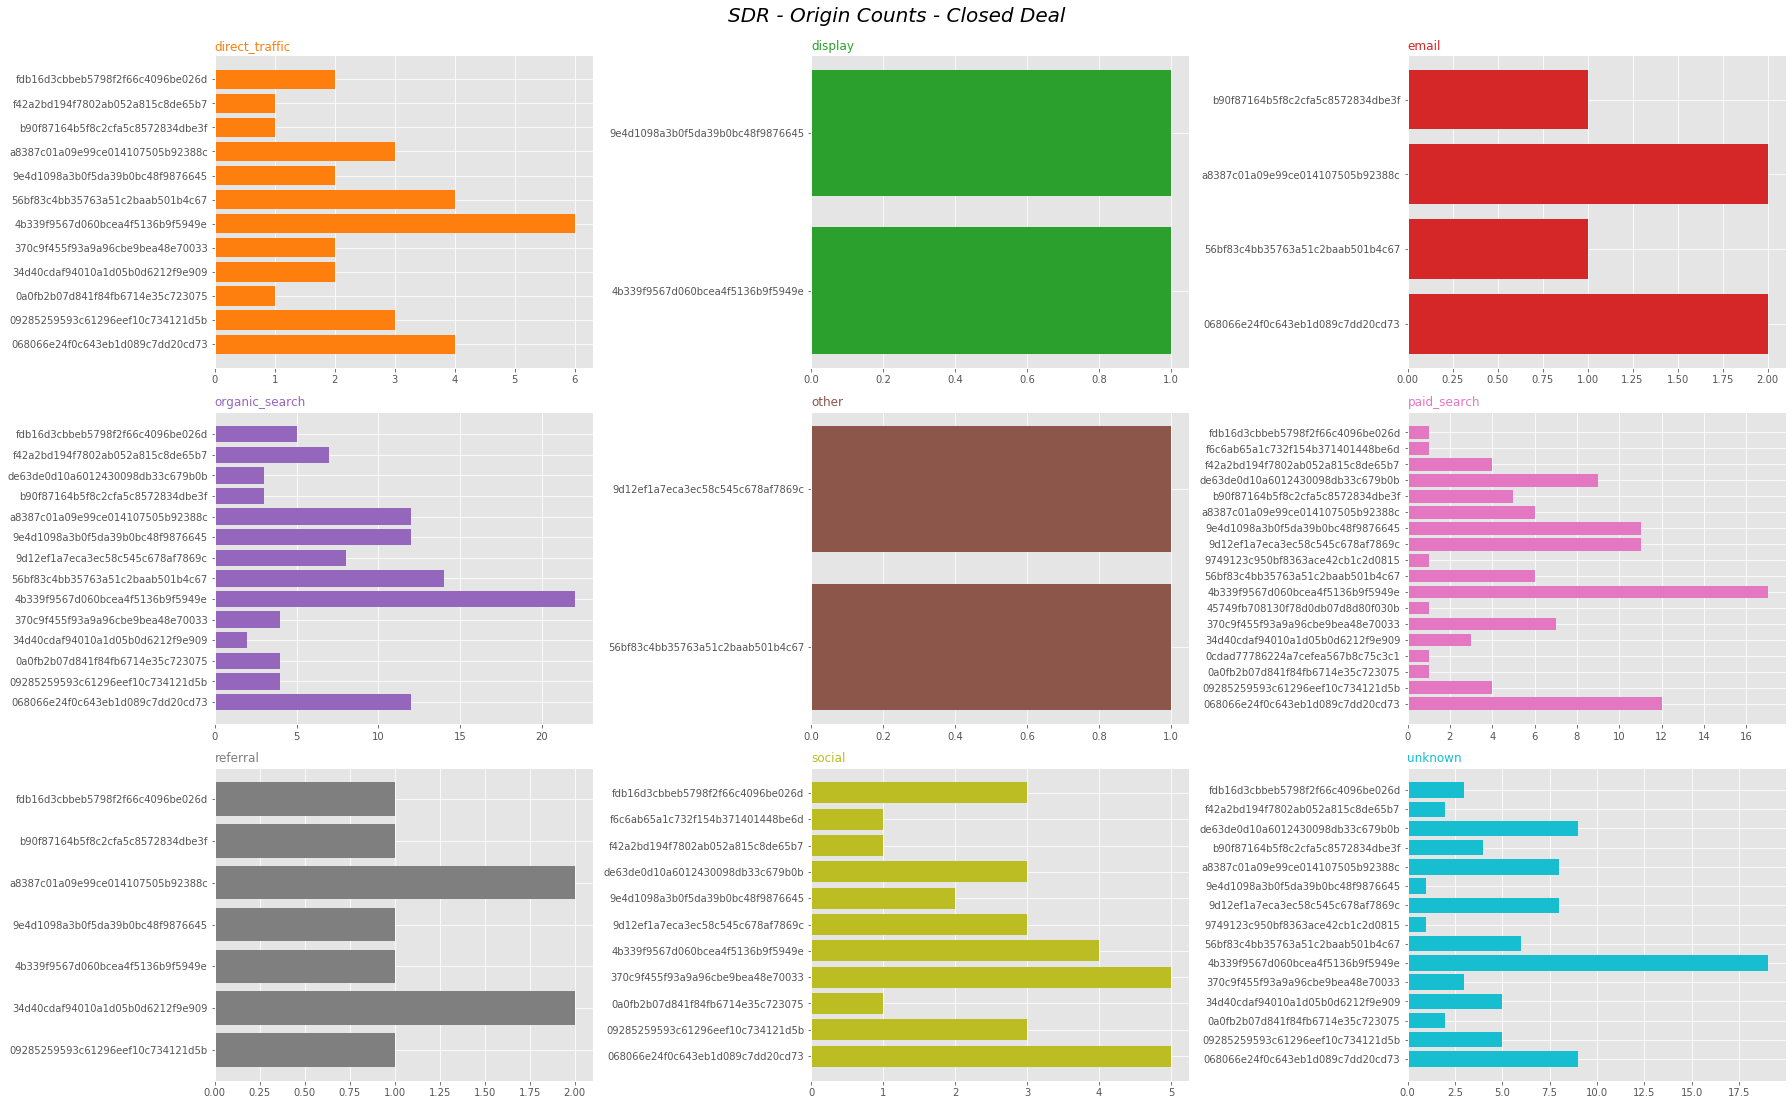

In [151]:
origin_df = sf_df.groupby(["origin","sdr_id"]).size().to_frame()
origin_df.reset_index(inplace=True)  

origin_df.columns= ["Origin","SDR_ID","Counts"]
palette = plt.get_cmap('tab10')

n_plots = origin_df["Origin"].nunique()
origin_list = origin_df["Origin"].unique()
fig = plt.figure(figsize=(25,15))
for plot_num in range(1,n_plots+1):
    plt.subplot(3,3, plot_num)
    tdf = origin_df[origin_df["Origin"] == origin_list[plot_num-1]]
#     if plot_num in range(7) :
#         plt.tick_params(
#             axis='x',         
#             which='both',      
#             bottom=False,     
#             top=False,        
#             labelbottom=False)
    plt.barh(tdf["SDR_ID"],tdf["Counts"],color=palette(plot_num))
    plt.title(origin_list[plot_num-1], loc='left', fontsize=12, fontweight=0, color=palette(plot_num))
    

plt.suptitle("SDR - Origin Counts - Closed Deal", fontsize=20, fontweight=0, color='black', style='italic', y=1.02)

fig.tight_layout()
plt.savefig("charts/origin_sdr_closed_deals.png")
plt.show()
    


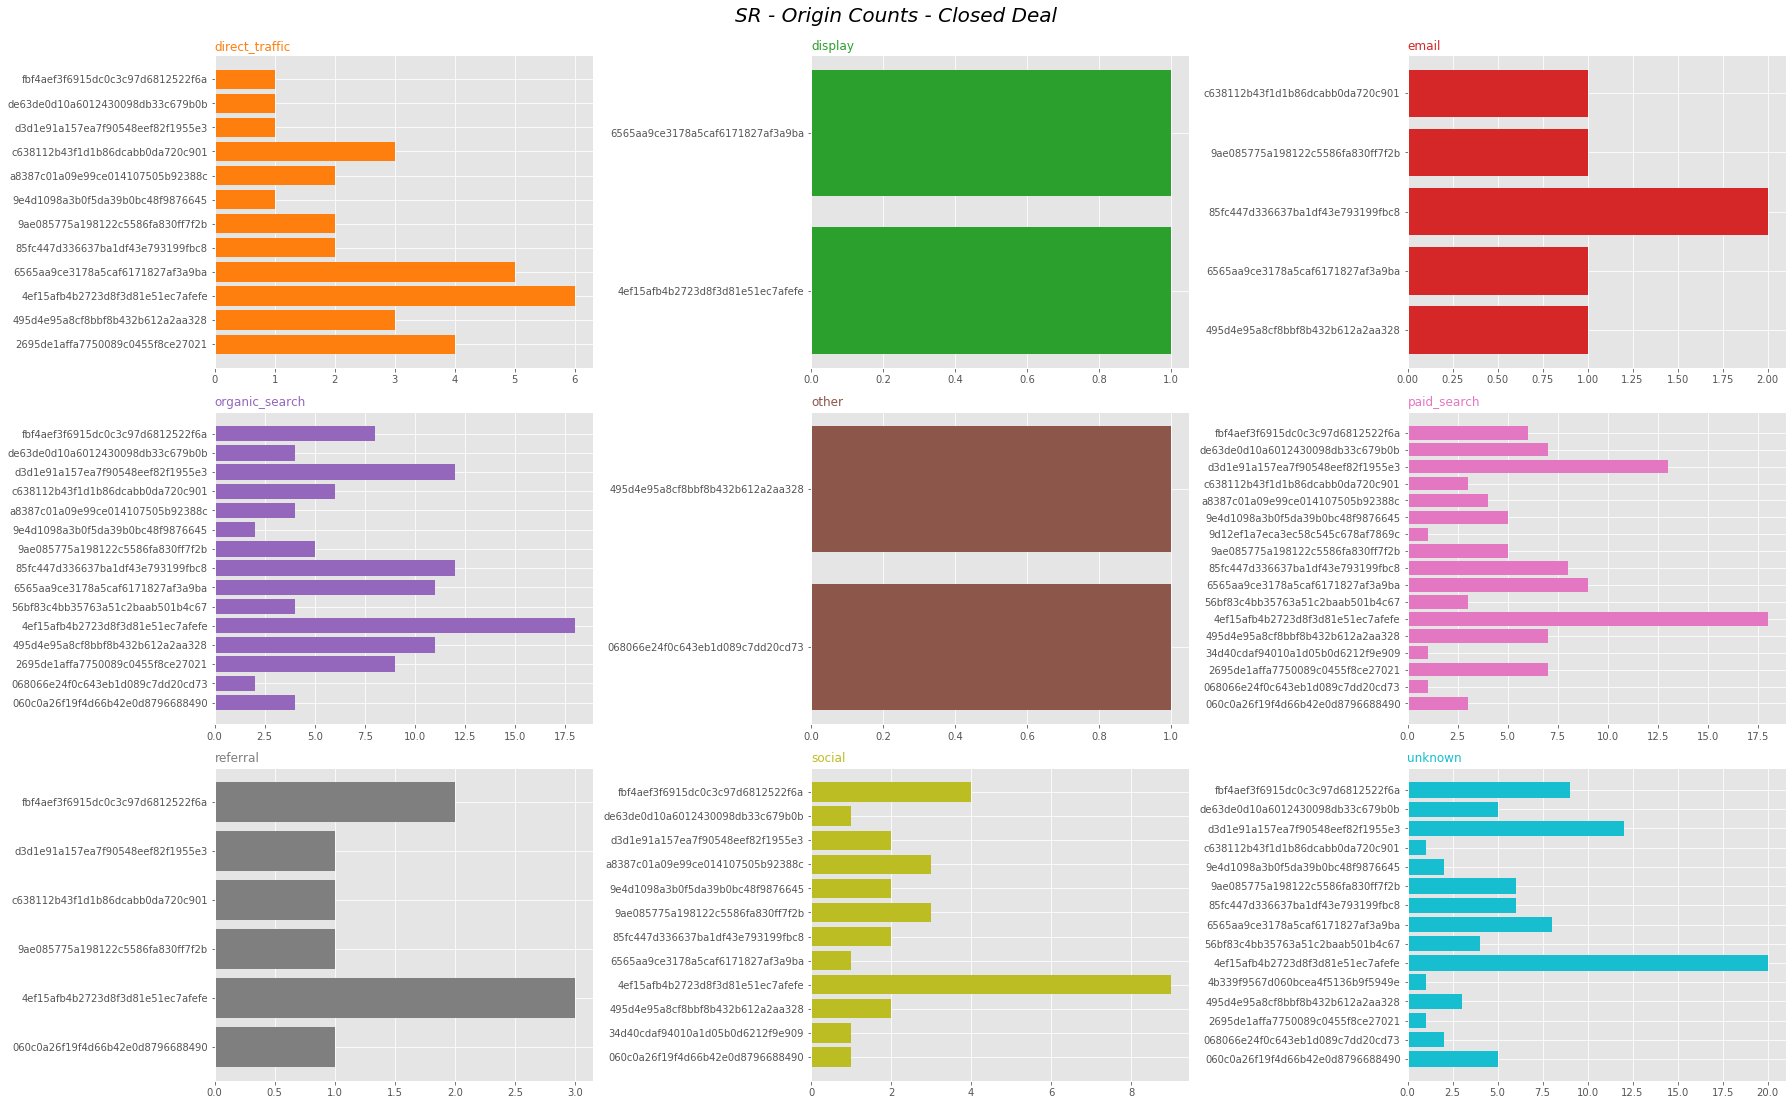

In [152]:
origin_df = sf_df.groupby(["origin","sr_id"]).size().to_frame()
origin_df.reset_index(inplace=True)  

origin_df.columns= ["Origin","SR_ID","Counts"]
palette = plt.get_cmap('tab10')

n_plots = origin_df["Origin"].nunique()
origin_list = origin_df["Origin"].unique()
fig = plt.figure(figsize=(25,15))
for plot_num in range(1,n_plots+1):
    plt.subplot(3,3, plot_num)
    tdf = origin_df[origin_df["Origin"] == origin_list[plot_num-1]]
#     if plot_num in range(7) :
#         plt.tick_params(
#             axis='x',         
#             which='both',      
#             bottom=False,     
#             top=False,        
#             labelbottom=False)
    plt.barh(tdf["SR_ID"],tdf["Counts"],color=palette(plot_num))
    plt.title(origin_list[plot_num-1], loc='left', fontsize=12, fontweight=0, color=palette(plot_num))
    

plt.suptitle("SR - Origin Counts - Closed Deal", fontsize=20, fontweight=0, color='black', style='italic', y=1.02)

fig.tight_layout()
plt.savefig("charts/origin_sr_closed_deals.png")
plt.show()

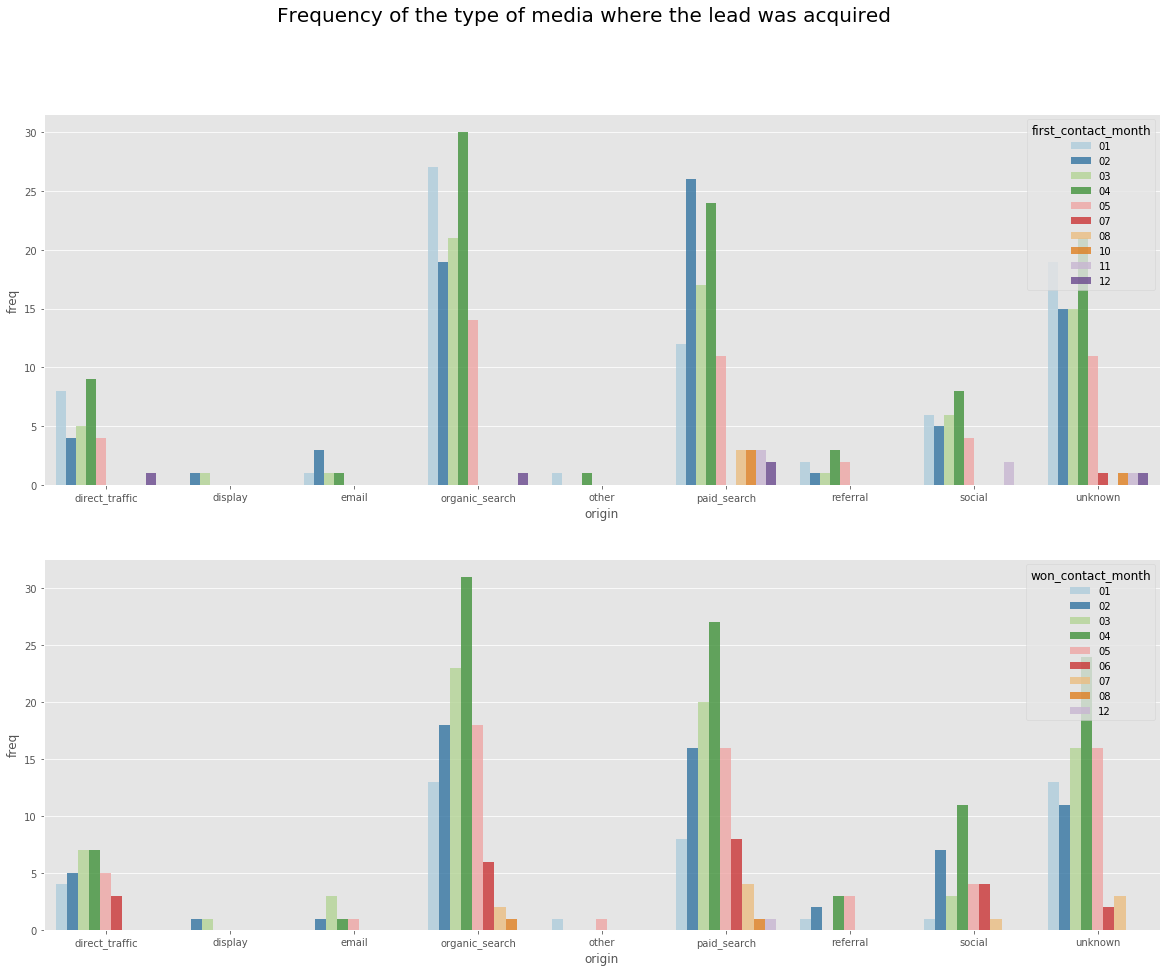

In [200]:
#Origin acquired over time (from being first date to won date)
sns.set_palette(sns.color_palette("Paired"))

series = pd.DataFrame(sf_df,columns = ['first_contact_date','origin'])
series['freq'] = series.groupby(['first_contact_date','origin'])['origin'].transform('count')
series = series.drop_duplicates()
new = series["first_contact_date"].str.split("-", n = 2, expand = True)
series['first_contact_month'] = new[1]
series = series.groupby(['first_contact_month','origin'])['freq'].agg('sum').reset_index()
series.sort_values("origin",inplace=True)

series2 = pd.DataFrame(sf_df,columns = ['won_date','origin'])
series2['freq'] = series2.groupby(['won_date','origin'])['origin'].transform('count')
series2 = series2.drop_duplicates()
new2 = series2["won_date"].str.split("-", n = 2, expand = True)
series2['won_contact_month'] = new2[1]
series2 = series2.groupby(['won_contact_month','origin'])['freq'].agg('sum').reset_index()
series2.sort_values("origin",inplace=True)

plt.figure(figsize=(20,15))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Origin', fontsize=12)
plt.subplot(2,1,1)
p1 = sns.barplot(data=series, x='origin',y='freq' , alpha=0.8, hue='first_contact_month')

plt.subplot(2,1,2)
p2 = sns.barplot(data=series2, x='origin',y='freq' , alpha=0.8, hue='won_contact_month')

plt.suptitle("Frequency of the type of media where the lead was acquired", fontsize=20, fontweight=0, color='black')
plt.savefig("charts/origin_acquire_won_time_analysis")
plt.show()

# Answering a few questions after this much analysis

### 1. What is the average number of days taken to convert a lead to closed lead?

Average number of days - 49, left skewed date ranges with many outliers

![ave1](charts/duration_days_closed_deals.png)
![ave2](charts/duration_45to450days_closed_deals.png)

### 2. Who are the top performers (SDRs and SRs)

Total closed deals - 841

Top 3 SDRs  -

`4b339f9567d060bcea4f5136b9f5949e` (140), `068066e24f0c643eb1d089c7dd20cd73` (81), `56bf83c4bb35763a51c2baab501b4c67` (74)    

Top 3 SRs - 

`4ef15afb4b2723d8f3d81e51ec7afefe` (133),`d3d1e91a157ea7f90548eef82f1955e3`(82),`6565aa9ce3178a5caf6171827af3a9ba` (74)

Top 3 Pairs of SDR and SRs -

1. SDR - `4b339f9567d060bcea4f5136b9f5949e` SR -`  4ef15afb4b2723d8f3d81e51ec7afefe`    **21 closed deals together**
2. SDR - `de63de0d10a6012430098db33c679b0b` SR -`  d3d1e91a157ea7f90548eef82f1955e3`    **19 closed deals together**
3. SDR - `4b339f9567d060bcea4f5136b9f5949e` SR -`6565aa9ce3178a5caf6171827af3a9ba` **18 closed deals together**



![sdr_top](charts/top_sdr.png)
![sr_top](charts/top_sr.png)

### 3. Which business segment is closed the most by SDRs + SRs

`Home Decor`, `Health and Beauty`, `Car_accessories`, `household_items` are few of the top business segmetns where deals were closed with business types who are usually resellers and manufactures


![business_segment](charts/business_segment_closed_deals.png)
![business_type](charts/business_type_closed_deals.png)

### 4. In the closed deals, which sellers have declared their revenue alongwith segment which can be used to guesstimate income/revenue of adnu 

1. Total number of closed companies are:-  **841**

2. Total number of companies about which Adnu provided who declared monthly revenue:  **45**

3. Total percentage information for closed company revenues - **~5.5%**

![revenue_plot0](charts/revenue_disclosed.png)

### 5. What are the best origin sources for leads which got converted?

In the raw MQL data, online search `(organic and paid)` took up 50% and `social, email and referral` took up 26%. Rest was through different sources.

In the closed deals data, online search `(organic and paid)` took up 55% and `social, email and referral` took up 15%. Rest was through different sources. 

We see a growth of unknown sources from **17%** in MQL data to **23%** in closed deals data.

We can also see how SDRs are interacting with the leads and closed counts for each origin source containing different SDRs who are prominent in converting from online searching.


#### MQL Data

![origin_mql)](charts/origin_mql.png)

#### Closed Deals Data
![origin_closed](charts/origin_closed.png)

#### Cleaned Closed Deals with SDR
![origin_sdr](charts/origin_sdr_closed_deals.png)


### 6 . Lack of data?



We see that we had got the data of **841 closed deals** mapped from **8000** MQL dataset.

When combined with seller dataset, we see that out of those 841 closed deals, we have only **379** present out of **3095** sellers in seller dataset **(~45%)** and rest seller data we don't have.

### 7. Next Step?

We see that there are some correlations existing with origin sources, SDRs and SRs which creates a specific funnel.

One of the case is for topmost SDR (`4b339f9567d060bcea4f5136b9f5949e`) and SR (`4ef15afb4b2723d8f3d81e51ec7afefe`).

They have closed nearly 150+ deals individually but together have only worked on 21 of them and they came from the origin source of online search.

Will carry out predictions to answer closing deal and future revenue related questions in the next notebook